# Student: Rafael Santos #HomeWork 5 - WeatherPy
## Data Analystics and Visualization Cohort 3

----

### Analysis


* While the closer to the equator the warmer the city is, it is interesting to notice the lowest temperatures occur mostly in cities in the extreme north hemisphere (positive latitude degrees. The lower incidence of extreme low temperatures in the south hemisphere may be explained by the fact that there are less cities near to the south pole than there are cities near to the north pole.

* Conversely, humidity levels range all the way from 20% to 100% across all latitudes. Similarly, cloudiness levels can be found through all levels across different latitudes. At the time this data was taken, the north hemisphire seemed to have higher concentration of cloudiness between latitudes of 20 to 55 degrees in the range of 70F to 90F.

* Curiously, the wind speeds were noticibly higher (25mph or more) in the cities with latitudes starting from approximatelly 40 degrees. Overall, most cities get wind at speeds of up to 10mph.

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
lats

array([-67.2880874 ,  26.64944205,   9.30434859, ..., -53.89298351,
        52.58242225,  84.48003855])

In [4]:
lngs

array([-106.79994294,   66.49442895,  -93.41767262, ..., -142.31000967,
         73.48071284,  -56.35280594])

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

* Quick check on how the cities are listed

In [6]:
cities[0:5]

['punta arenas', 'bela', 'champerico', 'mwingi', 'tabou']

In [7]:
print(cities[-1])

bestobe


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
speed = "imperial"

query_url = f"{url}appid={api_key}&units={units}&speed={speed}&q="


lon = []
lat =[]
temperature = []
humidity = []
cloudiness = []
windspeed = []
country =[]
names = []

def lists(x):
    names.append(x['name'])
    country.append(x['sys']['country'])
    lon.append(x['coord']['lon'])
    lat.append(x['coord']['lat'])
    temperature.append(x['main']['temp'])
    humidity.append(x['main']['humidity'])
    cloudiness.append(x['clouds']['all'])
    windspeed.append(x['wind']['speed'])
   
    return x

counter = 0
batch = 1

#Declared these variables since Python did not automatically identified variable type.
cityname = ""             
countrycode = ""
logging = ""



print("Beginning Data Retrieval from Open Weather Map\n\n")

for cityname in cities:    
    
    if counter < 50: #API limits 60 calls per minute, set threshold to not hit the limit.
        
        response = requests.get(query_url + cityname).json()
        
        try:
            lists(response)
        
        except:
            log = (f'Error: City "{cityname}" not found')
            print(log)
            logging = (logging + log + "\n")
            
        counter = counter + 1
        
    else:
        
        response = requests.get(query_url + cityname).json()
        
        try:
            lists(response)
        
        except:
            log = (f'Error: City "{cityname}" not found')
            print(log)
            logging = (logging + log + "\n")
              
        time.sleep(60) #API limits 60 calls per minute - adding a wait time between each batch of calls.
        counter = 0
        batch = batch + 1
    

    # In order to add the country information (countrycode) to the logging, added this try/except.
    try:
            countrycode = response['sys']['country']
        
    except:           
            print("Skip to next city")
            
    log = (f'Processing Record {counter} of set {batch}: | {cityname}, {countrycode}' + 
           f'\nJSON Call {counter}/{batch} made to: {url}appid=MYAPIKEYNUMBER&units={units}&speed={speed}&q={cityname}')
    
    logging = (logging + log + "\n")
    print(log)    

Beginning Data Retrieval from Open Weather Map


Processing Record 1 of set 1: | punta arenas, CL
JSON Call 1/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=punta arenas
Processing Record 2 of set 1: | bela, PK
JSON Call 2/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=bela
Processing Record 3 of set 1: | champerico, MX
JSON Call 3/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=champerico
Processing Record 4 of set 1: | mwingi, KE
JSON Call 4/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=mwingi
Processing Record 5 of set 1: | tabou, CI
JSON Call 5/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=tabou
Processing Record 6 of set 1: | aykhal, RU
JSON Call 6/1 made to: http:/

Processing Record 45 of set 1: | fortuna, ES
JSON Call 45/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=fortuna
Processing Record 46 of set 1: | ushuaia, AR
JSON Call 46/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=ushuaia
Processing Record 47 of set 1: | cayenne, GF
JSON Call 47/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=cayenne
Processing Record 48 of set 1: | san andres, PH
JSON Call 48/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=san andres
Processing Record 49 of set 1: | mar del plata, AR
JSON Call 49/1 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=mar del plata
Processing Record 50 of set 1: | crossville, US
JSON Call 50/1 made to: http://api.openweathermap

Processing Record 38 of set 2: | tasiilaq, GL
JSON Call 38/2 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=tasiilaq
Processing Record 39 of set 2: | arraial do cabo, BR
JSON Call 39/2 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=arraial do cabo
Processing Record 40 of set 2: | castro, CL
JSON Call 40/2 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=castro
Processing Record 41 of set 2: | lebu, ET
JSON Call 41/2 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=lebu
Processing Record 42 of set 2: | atuona, PF
JSON Call 42/2 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=atuona
Processing Record 43 of set 2: | kamenka, RU
JSON Call 43/2 made to: http://api.openweathermap.org/data/2.5

Processing Record 33 of set 3: | belaya gora, RU
JSON Call 33/3 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=belaya gora
Processing Record 34 of set 3: | butaritari, KI
JSON Call 34/3 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=butaritari
Processing Record 35 of set 3: | altayskoye, RU
JSON Call 35/3 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=altayskoye
Processing Record 36 of set 3: | russell, AR
JSON Call 36/3 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=russell
Processing Record 37 of set 3: | hasaki, JP
JSON Call 37/3 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=hasaki
Processing Record 38 of set 3: | umba, RU
JSON Call 38/3 made to: http://api.openweathermap.org/d

Processing Record 27 of set 4: | imeni poliny osipenko, RU
JSON Call 27/4 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=imeni poliny osipenko
Processing Record 28 of set 4: | mankera, NG
JSON Call 28/4 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=mankera
Processing Record 29 of set 4: | ust-kulom, RU
JSON Call 29/4 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=ust-kulom
Processing Record 30 of set 4: | adamovka, RU
JSON Call 30/4 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=adamovka
Processing Record 31 of set 4: | senador guiomard, BR
JSON Call 31/4 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=senador guiomard
Processing Record 32 of set 4: | samarai, PG
JSON Call 32/4 mad

Processing Record 20 of set 5: | besancon, FR
JSON Call 20/5 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=besancon
Processing Record 21 of set 5: | ikere, NG
JSON Call 21/5 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=ikere
Processing Record 22 of set 5: | poronaysk, RU
JSON Call 22/5 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=poronaysk
Processing Record 23 of set 5: | yuzhnyy, RU
JSON Call 23/5 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=yuzhnyy
Processing Record 24 of set 5: | talnakh, RU
JSON Call 24/5 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=talnakh
Processing Record 25 of set 5: | fairbanks, US
JSON Call 25/5 made to: http://api.openweathermap.org/data/2.5/wea

Processing Record 13 of set 6: | kununurra, AU
JSON Call 13/6 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=kununurra
Error: City "west bridgeford" not found
Skip to next city
Processing Record 14 of set 6: | west bridgeford, AU
JSON Call 14/6 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=west bridgeford
Processing Record 15 of set 6: | brigantine, US
JSON Call 15/6 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=brigantine
Processing Record 16 of set 6: | hirara, JP
JSON Call 16/6 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=hirara
Processing Record 17 of set 6: | bambous virieux, MU
JSON Call 17/6 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=bambous virieux
Processing Record

Processing Record 7 of set 7: | sahuaripa, MX
JSON Call 7/7 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=sahuaripa
Processing Record 8 of set 7: | totness, US
JSON Call 8/7 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=totness
Processing Record 9 of set 7: | lake city, US
JSON Call 9/7 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=lake city
Processing Record 10 of set 7: | umtata, ZA
JSON Call 10/7 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=umtata
Processing Record 11 of set 7: | lavrentiya, RU
JSON Call 11/7 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=lavrentiya
Processing Record 12 of set 7: | ballina, IE
JSON Call 12/7 made to: http://api.openweathermap.org/data/2.5/w

Processing Record 1 of set 8: | erenhot, CN
JSON Call 1/8 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=erenhot
Processing Record 2 of set 8: | arica, CL
JSON Call 2/8 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=arica
Processing Record 3 of set 8: | tangkak, MY
JSON Call 3/8 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=tangkak
Processing Record 4 of set 8: | alcaniz, ES
JSON Call 4/8 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=alcaniz
Processing Record 5 of set 8: | kruisfontein, ZA
JSON Call 5/8 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=kruisfontein
Processing Record 6 of set 8: | takoradi, GH
JSON Call 6/8 made to: http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 48 of set 8: | lubao, PH
JSON Call 48/8 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=lubao
Processing Record 49 of set 8: | haimen, CN
JSON Call 49/8 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=haimen
Processing Record 50 of set 8: | tokmak, UA
JSON Call 50/8 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=tokmak
Processing Record 0 of set 9: | bom jardim, BR
JSON Call 0/9 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=bom jardim
Processing Record 1 of set 9: | padang, ID
JSON Call 1/9 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=padang
Processing Record 2 of set 9: | port-de-bouc, FR
JSON Call 2/9 made to: http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 42 of set 9: | san cristobal, EC
JSON Call 42/9 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=san cristobal
Processing Record 43 of set 9: | yokadouma, CM
JSON Call 43/9 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=yokadouma
Processing Record 44 of set 9: | messina, IT
JSON Call 44/9 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=messina
Processing Record 45 of set 9: | izhma, RU
JSON Call 45/9 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=izhma
Error: City "villazon" not found
Skip to next city
Processing Record 46 of set 9: | villazon, RU
JSON Call 46/9 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=villazon
Processing Record 47 of set 9: | ketchikan, US
JSO

Processing Record 36 of set 10: | alugan, PH
JSON Call 36/10 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=alugan
Processing Record 37 of set 10: | ilhabela, BR
JSON Call 37/10 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=ilhabela
Processing Record 38 of set 10: | san nicolas, HN
JSON Call 38/10 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=san nicolas
Processing Record 39 of set 10: | galle, US
JSON Call 39/10 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=galle
Error: City "kuche" not found
Skip to next city
Processing Record 40 of set 10: | kuche, US
JSON Call 40/10 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=kuche
Processing Record 41 of set 10: | nogales, US
JSON Call 4

Processing Record 30 of set 11: | killybegs, IE
JSON Call 30/11 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=killybegs
Processing Record 31 of set 11: | ramhormoz, IR
JSON Call 31/11 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=ramhormoz
Processing Record 32 of set 11: | aksu, KZ
JSON Call 32/11 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=aksu
Processing Record 33 of set 11: | rumphi, MW
JSON Call 33/11 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=rumphi
Error: City "makung" not found
Skip to next city
Processing Record 34 of set 11: | makung, MW
JSON Call 34/11 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=makung
Processing Record 35 of set 11: | araouane, ML
JSON Call 3

Processing Record 23 of set 12: | nelson bay, AU
JSON Call 23/12 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=nelson bay
Processing Record 24 of set 12: | magadi, IN
JSON Call 24/12 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=magadi
Processing Record 25 of set 12: | griffith, AU
JSON Call 25/12 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=griffith
Processing Record 26 of set 12: | cairns, AU
JSON Call 26/12 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=cairns
Processing Record 27 of set 12: | upata, VE
JSON Call 27/12 made to: http://api.openweathermap.org/data/2.5/weather?appid=MYAPIKEYNUMBER&units=imperial&speed=imperial&q=upata
Processing Record 28 of set 12: | sainte-marie, CA
JSON Call 28/12 made to: http://api.openweathermap.org

### Confirming the size of the lists

In [9]:
#confirm sizes are the same before plotting.
print(len(cities))
print(len(names))
print(len(country))
print(len(lat))
print(len(lon))
print(len(temperature))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))

624
559
559
559
559
559
559
559
559


### Convert Raw Data to DataFrame

In [10]:
city_dict = {
    "city": names,
    "country" : country,
    "latitude":lat,
    "longitude":lon,
    "temperature": temperature,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed
}
city_data = pd.DataFrame(city_dict)
city_data.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,windspeed
0,Punta Arenas,CL,-53.16,-70.91,44.26,75,75,39.15
1,Bela,PK,26.23,66.31,74.64,33,0,5.28
2,Champerico,MX,16.38,-93.60,82.40,51,5,5.82
3,Mwingi,KE,-0.93,38.07,58.53,89,0,2.93
4,Tabou,CI,4.42,-7.36,84.00,98,12,12.88


In [11]:
# Export Summary to a file on disk, creating if not existent.
#--------------------------------------------------------------
outputfile = open('..\Output-WeatherPy-RafaelSantos.csv', 'w+' )
## Prompt user that file is being created
outputfile1 = city_data.to_csv(index=True)
print ("\n ***** Exporting to CSV file *****")

outputfile.write(outputfile1)
outputfile.close()

## Prompt user process ended
print ("\n ***** CSV File saved.*****\n")


 ***** Exporting to CSV file *****

 ***** CSV File saved.*****



In [12]:
outputfile1 = open('..\Logging-WeatherPy-RafaelSantos.txt', 'w+' )
## Prompt user that file is being created
print ("\n ***** Exporting to logging TXT file *****")

outputfile1.write(logging)
outputfile1.close()
    
## Prompt user process ended
print ("\n ***** CSV File saved.*****\n")


 ***** Exporting to logging TXT file *****

 ***** CSV File saved.*****



### Plotting the Data

#### Latitude vs. Temperature Plot

(<matplotlib.collections.PathCollection at 0x5605c50>, None)

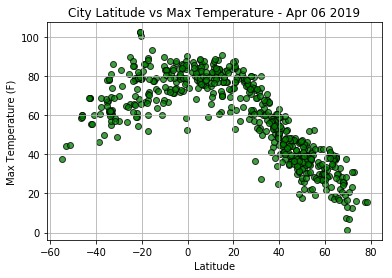

In [13]:
x_axis1 = city_data['latitude']       #use this for all plots
y_axis1 = city_data['temperature']

Temperature, ax = plt.subplots()
Temperature = plt.scatter(x_axis1,y_axis1 ,marker='o', alpha=0.75, color = "green",edgecolor ="black")

ax.grid(True)
plt.title("City Latitude vs Max Temperature - Apr 06 2019")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Save plot to file
Temperature,plt.savefig("../TemperaturePlot-RafaelSantos.png")

#### Latitude vs. Humidity Plot

(<matplotlib.collections.PathCollection at 0x564eba8>, None)

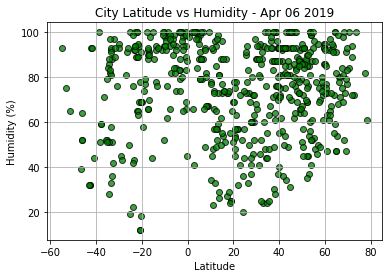

In [14]:
y_axis2 = city_data['humidity']

Humidity, ax = plt.subplots()
Humidity = plt.scatter(x_axis1,y_axis2 ,marker='o', alpha=0.75, color = "green", edgecolor ="black")

ax.grid(True)
plt.title("City Latitude vs Humidity - Apr 06 2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


#Save plot to file
Humidity,plt.savefig("../HumidityPlot-RafaelSantos.png")

#### Latitude vs. Cloudiness Plot

(<matplotlib.collections.PathCollection at 0x56b4f60>, None)

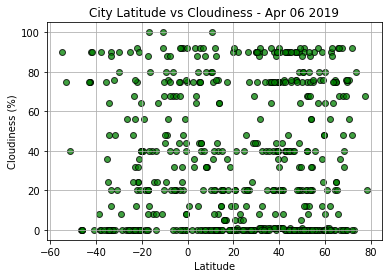

In [15]:
y_axis3 = city_data["cloudiness"]

Cloudiness, ax = plt.subplots()
Cloudiness = plt.scatter(x_axis1,y_axis3 ,marker='o', alpha=0.75, color = "green", 
                    edgecolor ="black")

ax.grid(True)
plt.title("City Latitude vs Cloudiness - Apr 06 2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Save plot to file
Cloudiness,plt.savefig("../CloudinessPlot-RafaelSantos.png")

#### Latitude vs. Wind Speed Plot

(<matplotlib.collections.PathCollection at 0xaeecb38>, None)

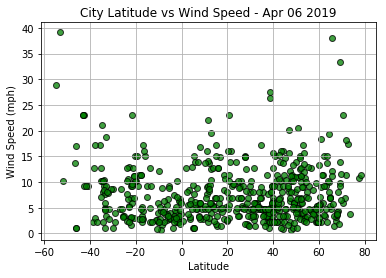

In [16]:
y_axis4 = city_data["windspeed"]

WindSpeed, ax = plt.subplots()
WindSpeed = plt.scatter(x_axis1,y_axis4 ,marker='o', alpha=0.75, color = "green", 
                    edgecolor ="black")

ax.grid(True)
plt.title("City Latitude vs Wind Speed - Apr 06 2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Save plot to file
WindSpeed,plt.savefig("../WindSpeedPlot-RafaelSantos.png")